In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import sys
sys.path.append('/workspace/deepgaze/')

In [6]:
import deepgaze
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepgaze.color_classification import HistogramColorClassifier
import tqdm
import pandas as pd

from pathlib import Path

## make model

In [7]:
image_train_val_dir = Path('/workspace/detect-me/product_classifier/data/milk/train-val')
p = Path('/workspace/detect-me/product_classifier/data/milk/train-val').joinpath('270060')

###  <code>def make_classifier(list_vms,...</code>

In [8]:
def make_classifier(list_vms,
                    image_train_val_dir=Path('/workspace/detect-me/product_classifier/data/milk/train-val'),
                   n=10):
    
    my_classifier = HistogramColorClassifier(channels=[0, 1, 2],
                                         hist_size=[128, 128, 128],
                                         hist_range=[1, 256, 1, 256, 1, 256],
                                         hist_type='BGR')

    DIR = Path(image_train_val_dir)
    LABELS = []
    IMAGE_PATH = []
#     RGB_color_hist = []
#     HSV_color_hist = []
    for vms in list_vms:
        image_path = DIR.joinpath(str(vms))
        images_vms_path = np.random.choice(list(image_path.glob('*.jp*')), n) # n
        for image_path in tqdm.tqdm(images_vms_path, desc=''):
            img = cv2.imread(str(image_path))
#             h = cv2.calcHist([img], , None, [

# 255], [1, 256])    
            label = image_path.parent.stem
            
            LABELS.append(label)
            IMAGE_PATH.append(image_path)
            # add_image_hist_to_model
            my_classifier.addModelHistogram(img)
    return my_classifier, LABELS, IMAGE_PATH

### <code>def vms_image(vms,):</code>

In [9]:
def vms_image(vms,):
    d = f'/workspace/detect-me/product_classifier/data/milk/train-val/{vms}'
    im_p = np.random.choice(list(Path(d).rglob('*.jp*')))
    im = cv2.imread(str(im_p))
    return im 

### <code>def predict(image, cls, method="intersection"):</code>

In [10]:
def predict(image, cls, method="intersection"):
    comparison_array = cls.returnHistogramComparisonArray(image, method=method)
    #Normalisation of the array
    comparison_distribution = comparison_array / np.sum(comparison_array)
    comparison_distribution = comparison_array / np.sum(comparison_array)
    
    return comparison_array,comparison_distribution

### <code>def draw_image_histogram(image ... </code>

In [11]:
def draw_image_histogram(image, channels, color='k', ax =None):
    h = cv2.calcHist([image], channels, None, [255], [1, 256])
#     h = remove_b(h,5)
    plt.plot(h, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, h.max()])

### <code>def show_color_histogram(image ... </code>

In [12]:
def show_color_histogram(image):
    for i, col in enumerate(['b', 'g', 'r']):
        draw_image_histogram(image, [i], color=col)
    plt.show()

***

***

# CLS
## HistogramColorClassifier

***

In [10]:
CLS, LABELS , IMAGES_PATH = make_classifier([12548,  256923, 349558,
                                             236059, 270061, 270060])

100%|██████████| 10/10 [00:00<00:00, 88.06it/s]


In [11]:
!ls $image_train_val_dir

106667	171721	212072	236059	256925	294040	312287	336566	350355	49093
106668	171722	212073	244409	256926	294041	312288	336567	350356	49094
106669	172276	212074	244410	270060	297969	312289	338326	350359	49095
106672	172277	212397	244920	270061	301104	313829	338327	351089	49096
106673	185839	214941	244921	274518	301105	324070	348230	352775	71477
106813	200618	222961	248653	276017	301106	324071	348234	353834	71478
108692	200621	222962	248655	276244	301107	325574	349185	360322	71479
12548	200622	225803	248658	276245	304609	325964	349186	360918	71481
138701	202043	228771	248662	276246	305693	325965	349187	48674	71484
151217	202316	233231	249565	277427	312280	325966	349371	48675	97471
153500	204888	234283	250706	283215	312281	332974	349558	48676	97472
162661	204889	234284	255690	283216	312282	332975	349560	48678
164312	204890	234285	255691	286735	312283	335394	349561	48683
164323	206820	235797	256923	286736	312284	335406	350178	49092


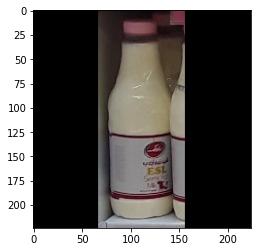

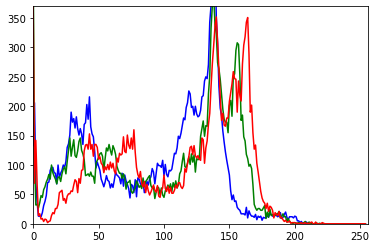

In [12]:
image_270061 = vms_image(270061)
plt.imshow(image_270061[...,::-1])
plt.show()
show_color_histogram(image_270061)

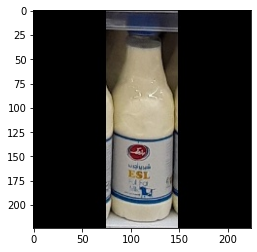

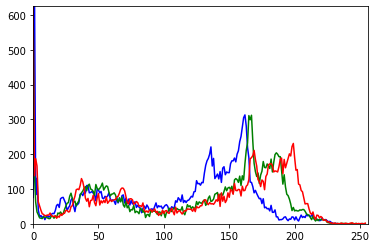

In [13]:
image_270060 = vms_image(270060)
plt.imshow(image_270060[...,::-1])
plt.show()
show_color_histogram(image_270060)

In [14]:
arr, prob = predict(image_270060, CLS)

df = pd.DataFrame(data=dict(prob = prob,
                       arr = arr,
                       labels = LABELS,
                       image_path = IMAGES_PATH))

unique_groups = df.labels.unique()

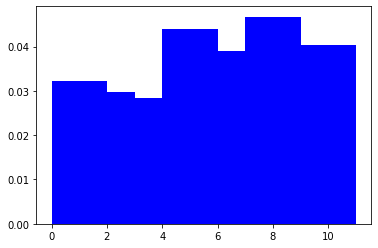

In [15]:
for gr in df.labels.unique():
    x = list(df.groupby('labels').get_group(gr)['prob'])
    r1 = list(np.arange(1,11))
    plt.bar(r1, x, width = 2, color = ['blue']*10, label=gr)

(-2.4450000000000003, 63.44499999999999, 0.0, 0.0490608490616153)

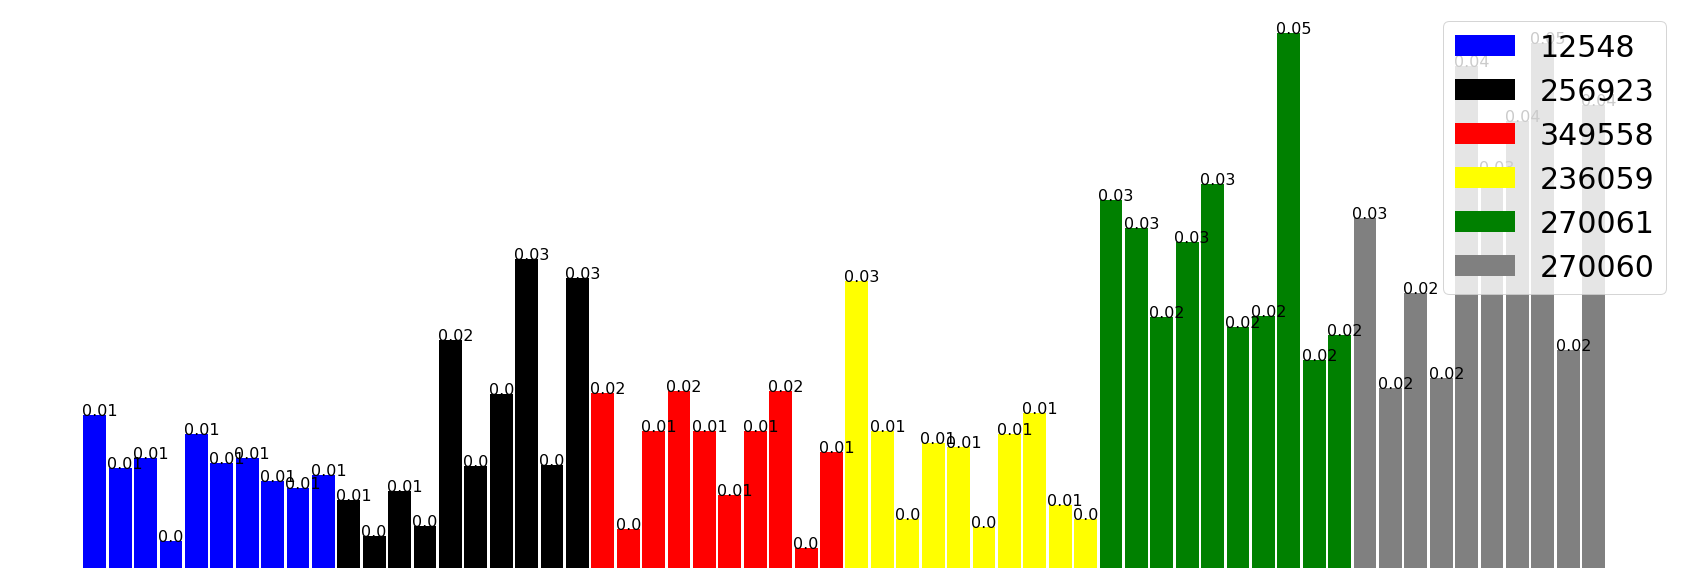

In [16]:
# Create bars
barWidth = 0.9
bars1 = list(df.groupby('labels').get_group(unique_groups[0])['prob'])
bars2 = list(df.groupby('labels').get_group(unique_groups[1])['prob'])
bars3 = list(df.groupby('labels').get_group(unique_groups[2])['prob'])
bars4 = list(df.groupby('labels').get_group(unique_groups[3])['prob'])
bars5 = list(df.groupby('labels').get_group(unique_groups[4])['prob'])
bars6 = list(df.groupby('labels').get_group(unique_groups[5])['prob'])
bars7 = bars1 + bars2 + bars3 + bars4 + bars5 + bars6
 
# The X position of bars
r1 = list(np.arange(1,11))
r2 =  list(np.arange(11,21))
r3 = list(np.arange(21,31))
r4 = list(np.arange(31,41))
r5 = list(np.arange(41,51))
r6 = list(np.arange(51,61))
r7 = r1 + r2 + r3 + r4 + r5 + r6
plt.figure(figsize=(30,10))
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = ['blue']*10, label=unique_groups[0])
plt.bar(r2, bars2, width = barWidth, color = ['black']*10, label=unique_groups[1])
plt.bar(r3, bars3, width = barWidth, color = ['red']*10, label=unique_groups[2])
plt.bar(r4, bars4, width = barWidth, color = ['yellow']*10, label=unique_groups[3])
plt.bar(r5, bars5, width = barWidth, color = ['green']*10, label=unique_groups[4])
plt.bar(r6, bars6, width = barWidth, color = ['gray']*10, label=unique_groups[5])
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# # Text below each barplot with a rotation at 90°
# plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# # Create labels
# label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each bar
for i in range(len(r7)):
    plt.text(x = r7[i]-0.5 , y = bars7[i], s = round(bars7[i],2), size = 16)

# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
plt.legend(loc=1, prop={'size': 30})
plt.axis('off')
# # Show graphic
# plt.show()

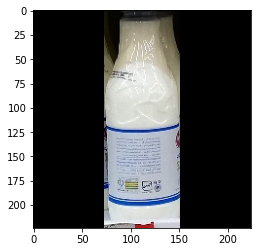

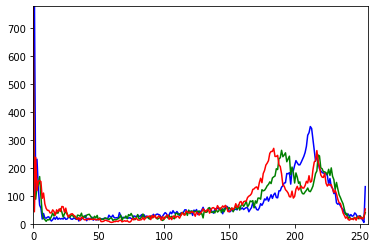

In [17]:
image_349558 = vms_image(270060)
plt.imshow(image_349558[...,::-1])
plt.show()
show_color_histogram(image_349558)

## KMEANS SVM foe ONE vms

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster

In [27]:
list_vms = [12548,  256923, 349558,236059, 270061, 270060]

# FEATURE EXTRACTION 

In [29]:
vms = 270061
image_train_val_dir=\
    Path(f'/workspace/detect-me/product_classifier/data/milk/train-val/{vms}')


my_classifier = HistogramColorClassifier(channels=[0, 1, 2],
                                     hist_size=[128, 128, 128],
                                     hist_range=[1, 256, 1, 256, 1, 256],
                                     hist_type='BGR')

DIR = Path(image_train_val_dir)
LABELS = []
IMAGE_PATH = []
RGB_color_hist = []
HSV_color_hist = []
#     HSV_color_hist = []
for image_path in tqdm.tqdm(DIR.glob('*.jp*'), desc=''):
    img = cv2.imread(str(image_path))
    
    RGBcolors_hist = np.vstack(
    [cv2.calcHist([img], [c], None, [128], [1, 256]) for c in 
            [0,1,2]])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    HSVcolors_hist = np.vstack(
    [cv2.calcHist([hsv], [c], None, [128], [1, 256]) for c in 
            [0,1,2]])
    label = image_path.parent.stem
    LABELS.append(label)
    IMAGE_PATH.append(image_path)
    RGB_color_hist.append(RGBcolors_hist)
    HSV_color_hist.append(HSVcolors_hist)
    # add_image_hist_to_model
    my_classifier.addModelHistogram(img)

In [63]:
x = np.array(RGB_color_hist)

x = np.squeeze(x)

kmeans_cluster = cluster.KMeans(n_clusters=7)
m = kmeans_cluster.fit(x)

pred = m.predict(x)

clusters = pd.DataFrame(list(zip(pred,IMAGE_PATH )))

dataframe = pd.DataFrame(list(zip(pred,IMAGE_PATH )))


g0 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(0)
g1 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(1)
g2 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(2)
g3 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(3)
g4 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(4)
g5 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(5)
g6 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(6)
# g7 = pd.DataFrame(list(zip(pred,IMAGE_PATH ))).groupby(0).get_group(7)

In [43]:
from itertools import islice

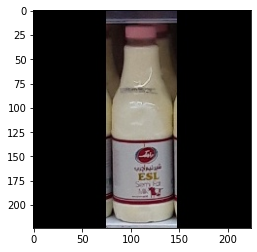

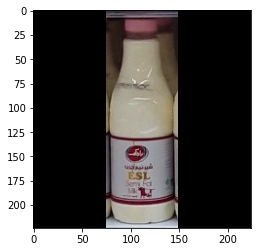

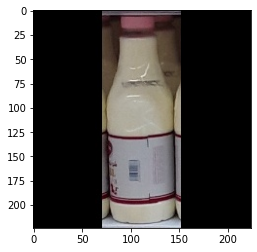

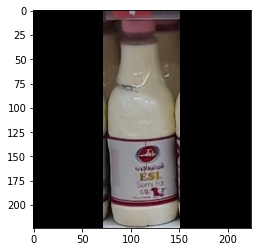

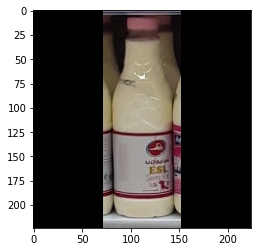

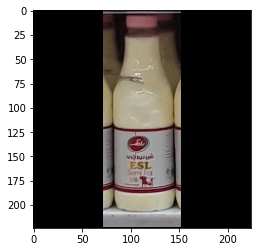

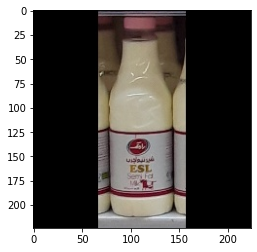

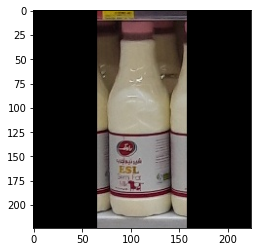

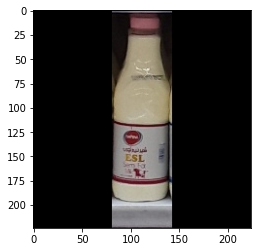

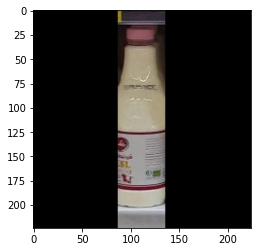

In [69]:
for row in islice(g1.itertuples(), 10):
    im = cv2.imread(str(row._2))
    plt.imshow(im[...,::-1])
    plt.show()

(-0.5, 383.5, 0.0, 1062.6)

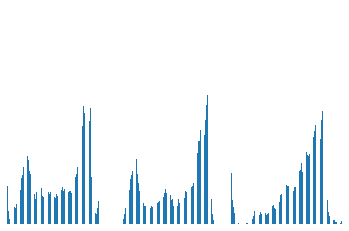

In [46]:
pd.Series(RGBcolors_hist.flatten()).plot(kind='bar')
plt.axis('off')

# COLOR HISROGRAM WITH COLOR

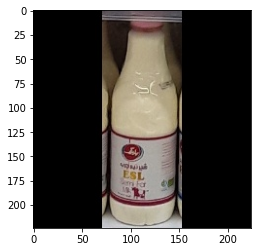

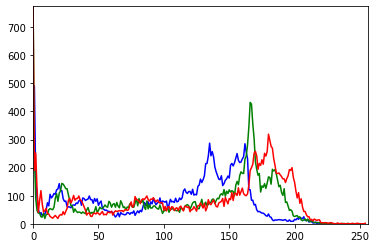

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster


image_349558 = vms_image(270061)
plt.imshow(image_349558[...,::-1])
plt.show()
show_color_histogram(image_349558)


# read image into range 0 to 1
img = image_349558 / 255

# set number of colors
number = 16

# quantize to 16 colors using kmeans
h, w, c = img.shape
img2 = img.reshape(h*w, c)
kmeans_cluster = cluster.KMeans(n_clusters=number)
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

# need to scale back to range 0-255 and reshape
img3 = cluster_centers[cluster_labels].reshape(h, w, c)*255.0
img3 = img3.astype('uint8')

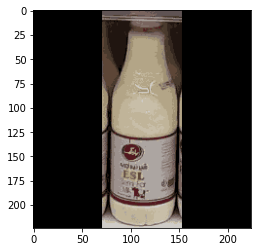

In [21]:
plt.imshow(img3[...,::-1])

In [22]:
# reshape img to 1 column of 3 colors
# -1 means figure out how big it needs to be for that dimension
img4 = img3.reshape(-1,3)

In [23]:
# get the unique colors
colors, counts = np.unique(img4, return_counts=True, axis=0)
print(colors)
print("xxx")
print(counts)
unique = zip(colors,counts)

[[  0   0   0]
 [ 16  21  32]
 [ 31  24  83]
 [ 31  39  52]
 [ 45  58  73]
 [ 55  70  93]
 [ 83  83  95]
 [ 94 100 121]
 [115 123 137]
 [116 146 161]
 [135 165 179]
 [140 144 156]
 [153 180 192]
 [161 165 172]
 [168 190 200]
 [200 204 207]]
xxx
[32248  1493   433   661   966   914   889  1146  1310   979  2614  1127
  2026  1751  1202   417]


#201510
#53181f
#34271f
#493a2d
#5d4637
#5f5353
#79645e
#897b73
#a19274
#b3a587
#9c908c
#c0b499
#aca5a1
#c8bea8
#cfccc8


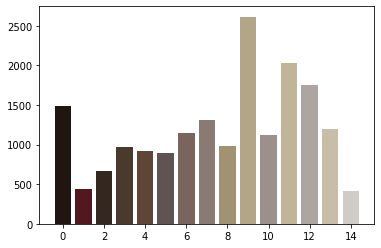

In [24]:
# function to convert from r,g,b to hex 
def encode_hex(color):
    b=color[0]
    g=color[1]
    r=color[2]
    hex = '#'+str(bytearray([r,g,b]).hex())
    print(hex)
    return hex

# plot each color
fig = plt.figure()
for i, uni in enumerate(list(unique)[1:]):
    color = uni[0]
    count = uni[1]
    plt.bar(i, count, color=encode_hex(color))

# show and save plot
plt.show()
# fig.savefig('barn_color_historgram.png')
# plt.close(fig) 

# REMOVE BACK GROUND 

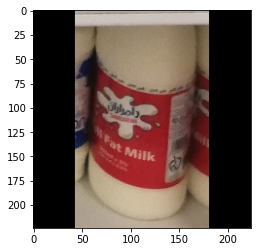

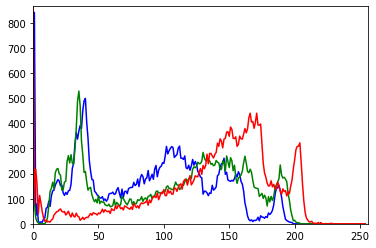

In [29]:
image_349558 = vms_image(349558)
plt.imshow(image_349558[...,::-1])
plt.show()
show_color_histogram(image_349558)

In [26]:
def remove_b_background(image):
    tmp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
    b, g, r = cv2.split(image)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    return dst

In [30]:
dst = remove_b_background(image_349558)

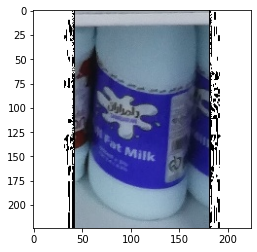

In [31]:
plt.imshow(dst)

In [77]:
# originalImage = cv2.imread('C:/Users/N/Desktop/Test.jpg')
grayImage = cv2.cvtColor(image_349558, cv2.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

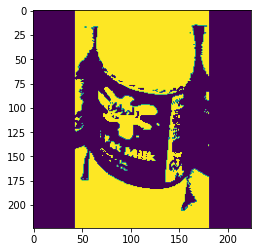

In [78]:
plt.imshow(blackAndWhiteImage)

In [ ]:
cv2.imshow('Black white image', blackAndWhiteImage)
cv2.imshow('Original image',originalImage)
cv2.imshow('Gray image', grayImage)
  